In [1]:
import json as j
import pandas as pd
import re
import numpy as np
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.naive_bayes import ComplementNB
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.externals import joblib
import pickle
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [460]:
import json
json_file=r"C:\Users\HP\Downloads/crime3.json"
with open(json_file,'r') as j:
    contents=json.loads(j.read())    
df=pd.read_json(r'C:\Users\HP\Downloads/crime3.json')


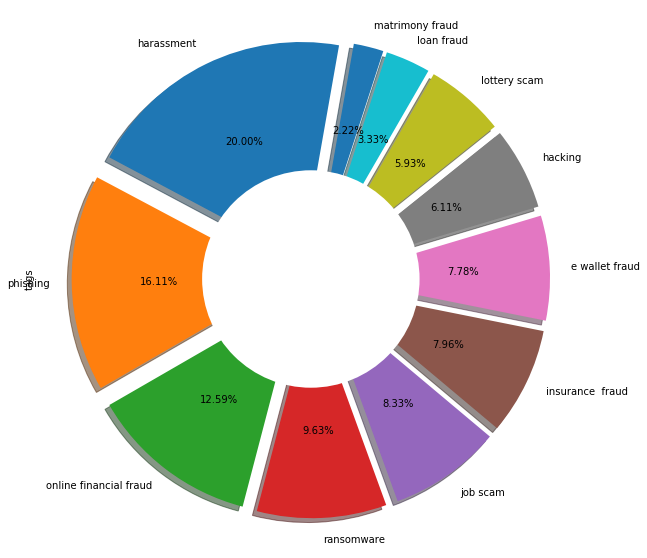

In [461]:
my_tags = ['lottery scam','loan fraud','job scam','matrimony fraud','phishing','harassment','online financial fraud','ransomware','insurance fraud','e wallet fraud','hacking']
plt.figure(figsize=(15,10))
explode = (0.1, 0.1, 0.1, 0.1,0.1, 0.1, 0.1, 0.1,0.1,0.1,0.1)
plt.tight_layout()
df.tags.value_counts().plot(kind='pie',explode=explode,autopct='%1.2f%%',
       shadow=True, startangle=80)
centre_circle = plt.Circle((0,0),0.50,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
#df.tags.value_counts().plot(kind='bar')

In [462]:
X_train, X_test, y_train, y_test = train_test_split(df['post'], df.tags, test_size=0.2)

In [463]:
pipeline = Pipeline([('vect', TfidfVectorizer(ngram_range=(1, 2), stop_words="english", sublinear_tf=True)),
                     ('chi',  SelectKBest(chi2, k='all')),
                     ('clf', ComplementNB())])

In [464]:
model = pipeline.fit(X_train, y_train)


In [465]:
vectorizer = model.named_steps['vect']
chi = model.named_steps['chi']
clf = model.named_steps['clf']

In [466]:
feature_names = vectorizer.get_feature_names()
feature_names = [feature_names[i] for i in chi.get_support(indices=True)]
feature_names = np.asarray(feature_names)

In [467]:
target_names = ['ransomware', 'phishing', 'hacking', 'matrimony fraud', 'lottery scam','job scam','online financial fraud','loan fraud','insurance fraud','e wallet fraud']
print("top 11 keywords per class:")
for i, label in enumerate(target_names):
    top10 = np.argsort(clf.coef_[i])[-10:]
    print("%s: %s" % (label, " ".join(feature_names[top10])))

top 11 keywords per class:
ransomware: detect prevent receive cashback cashback receive deducted money deducted bank report online asked request money google report mobikwick unified payment
phishing: hacked report hacked instagram access facebook access gmail recovery steps suit file suit recovery think instagram instagram hacked
hacking: messages calling sites uses sites internet messages calls messages content messages facebook messages instagram following target cyber bully
matrimony fraud: company transferred process company time company thought profit properly properly transferred commits insurance bonus properly xyz company
lottery scam: hire problem letter mail letter phone filing complaint cautious filing phone scam scam victim hire demands deposit
job scam: avaid loan online loan like id paid processing pan number pay file charges loan submitted documents informed loan loan fraud
online financial fraud: handling true file fir file lottery charges lottery charges victim prize 

In [453]:
print("accuracy score: " + str(model.score(X_test, y_test)))

accuracy score: 0.8611111111111112


In [454]:
print(model.predict([input()]))

skdjf
['e wallet fraud']


Confusion matrix, without normalization
[[13  0  0  0  0  0  0  0  2  1  0]
 [ 0  3  0  0  0  0  0  0  0  0  0]
 [ 0  0 13  0  0  0  0  0  0  0  0]
 [ 0  0  0  4  0  0  0  0  0  0  0]
 [ 1  0  0  0 10  0  0  0  0  1  0]
 [ 0  0  0  0  0  6  0  0  0  0  0]
 [ 0  0  0  0  0  0  7  0  0  0  0]
 [ 0  0  1  0  0  0  0  2  0  0  1]
 [ 1  0  0  0  0  0  0  0 12  0  0]
 [ 1  0  1  0  0  0  0  0  3 16  0]
 [ 1  0  1  0  0  0  0  0  0  0  7]]
Normalized confusion matrix
[[0.8125     0.         0.         0.         0.         0.
  0.         0.         0.125      0.0625     0.        ]
 [0.         1.         0.         0.         0.         0.
  0.         0.         0.         0.         0.        ]
 [0.         0.         1.         0.         0.         0.
  0.         0.         0.         0.         0.        ]
 [0.         0.         0.         1.         0.         0.
  0.         0.         0.         0.         0.        ]
 [0.08333333 0.         0.         0.         0.83333333 0.
  0

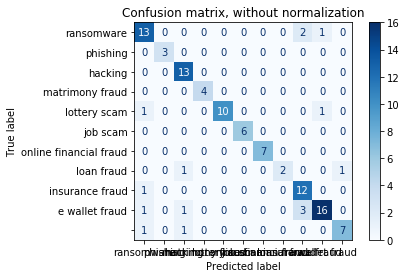

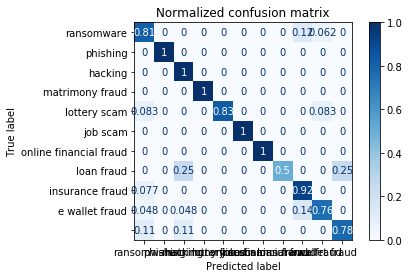

In [455]:
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_test, y_test,
                                 display_labels=target_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)

In [32]:
filename='model.pkl'

In [33]:
joblib.dump(model,filename)

['model.pkl']